[ 2.-2.j  3.-4.j -6.-2.j -1.-2.j]
[2.82842712 5.         6.32455532 2.23606798]


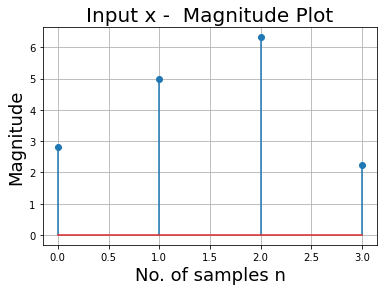

[-0.78539816 -0.92729522 -2.8198421  -2.03444394]


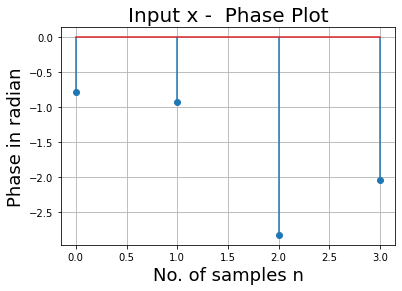

In [11]:
#Computing DFT and observing effects of zero padding
import numpy as np
import math , cmath
import matplotlib.pyplot as plt
import pandas as pd
pi = math.pi

x = np.array([2-2j, 3-4j, -6-2j, -1-2j])

print(x)

xphase = np.zeros(len(x))
xmag = np.zeros(len(x))

#loop to find magnitude and phase of complex numbers
for i in range(0,len(x)) :
    polari = cmath.polar(x[i])
    xmag[i] = polari[0]
    xphase[i] = polari[1]
    
print(xmag)
plt.stem(xmag)
plt.title("Input x -  Magnitude Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Magnitude', fontsize= 18)
plt.grid(True)
plt.show()

print(xphase)
plt.stem(xphase)
plt.title("Input x -  Phase Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Phase in radian', fontsize= 18)
plt.grid(True)
plt.show()

In [3]:
#creating twiddle factor matrix
k = np.array(range(0,len(x)))
N = len(x)
W = np.zeros((N**2),dtype=np.complex_)
W = np.reshape(W, (4,4))

#function to find twiddle factor matrix for given length of signal
def twiddlefunction(k, n, N) :

    x = math.cos((2*pi*n*k)/N)
    x1 = round(x, 2)
    y = -math.sin((2*pi*n*k)/N)
    y1 = round(y, 2)
    z = complex(x1,y1)
    return(z)

for i in range(N):
    for j in range(N):
        W[i][j] = twiddlefunction(i, j, N)
        
print(W)

[[ 1.-0.j  1.-0.j  1.-0.j  1.-0.j]
 [ 1.-0.j  0.-1.j -1.-0.j -0.+1.j]
 [ 1.-0.j -1.-0.j  1.+0.j -1.-0.j]
 [ 1.-0.j -0.+1.j -1.-0.j  0.-1.j]]


In [4]:
#DFT result
X1 = np.matmul(W,x)
print(X1)

[-2.-10.j  6. -4.j -6. +2.j 10. +4.j]


In [5]:
#verification
from scipy.fft import fft, ifft
y = fft(x)

y

array([-2.-10.j,  6. -4.j, -6. +2.j, 10. +4.j])

[10.19803903  7.21110255  6.32455532 10.77032961]


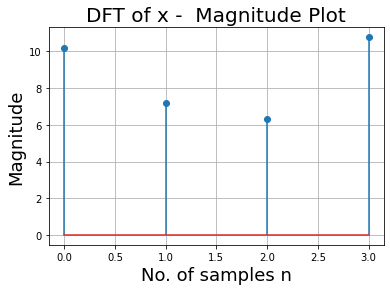

[-1.76819189 -0.5880026   2.8198421   0.38050638]


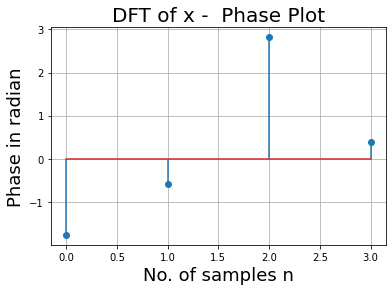

In [7]:
X1phase = np.zeros(len(X1))
X1mag = np.zeros(len(X1))


for i in range(0,len(X1)) :
    polari = cmath.polar(X1[i])
    X1mag[i] = polari[0]
    X1phase[i] = polari[1]

print(X1mag)
plt.stem(X1mag)
plt.title("DFT of x -  Magnitude Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Magnitude', fontsize= 18)
plt.grid(True)
plt.show()

print(X1phase)
plt.stem(X1phase)
plt.title("DFT of x -  Phase Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Phase in radian', fontsize= 18)
plt.grid(True)
plt.show()


In [9]:
#IDFT of obtained X(k) to get back input and verify
input1 = ifft(X1)
print(input1)

[ 2.-2.j  3.-4.j -6.-2.j -1.-2.j]


[ 2.-2.j  3.-4.j -6.-2.j -1.-2.j]
[2.82842712 5.         6.32455532 2.23606798 0.         0.
 0.         0.        ]


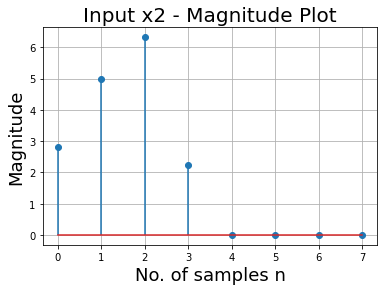

[-0.78539816 -0.92729522 -2.8198421  -2.03444394  0.          0.
  0.          0.        ]


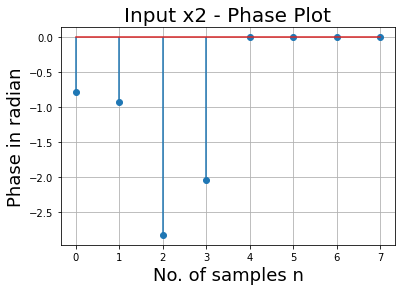

In [22]:
x2 = np.array([2-2j, 3-4j, -6-2j, -1-2j, 0, 0, 0, 0])
print(x)

x2phase = np.zeros(len(x2))
x2mag = np.zeros(len(x2))


for i in range(0,len(x2)) :
    polari = cmath.polar(x2[i])
    x2mag[i] = polari[0]
    x2phase[i] = polari[1]
    
print(x2mag)
plt.stem(x2mag)
plt.title("Input x2 - Magnitude Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Magnitude', fontsize= 18)
plt.grid(True)
plt.show()

print(x2phase)
plt.stem(x2phase)
plt.title("Input x2 - Phase Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Phase in radian', fontsize= 18)
plt.grid(True)
plt.show()

In [13]:
#creating twiddle factor matrix
k = np.array(range(0,len(x2)))
N = len(x2)
W2 = np.zeros((N**2),dtype=np.complex_)
W2 = np.reshape(W2, (8,8))

for i in range(N):
    for j in range(N):
        W2[i][j] = twiddlefunction(i, j, N)
        
print(W2)

[[ 1.  -0.j    1.  -0.j    1.  -0.j    1.  -0.j    1.  -0.j    1.  -0.j
   1.  -0.j    1.  -0.j  ]
 [ 1.  -0.j    0.71-0.71j  0.  -1.j   -0.71-0.71j -1.  -0.j   -0.71+0.71j
  -0.  +1.j    0.71+0.71j]
 [ 1.  -0.j    0.  -1.j   -1.  -0.j   -0.  +1.j    1.  +0.j    0.  -1.j
  -1.  -0.j   -0.  +1.j  ]
 [ 1.  -0.j   -0.71-0.71j -0.  +1.j    0.71-0.71j -1.  -0.j    0.71+0.71j
   0.  -1.j   -0.71+0.71j]
 [ 1.  -0.j   -1.  -0.j    1.  +0.j   -1.  -0.j    1.  +0.j   -1.  -0.j
   1.  +0.j   -1.  -0.j  ]
 [ 1.  -0.j   -0.71+0.71j  0.  -1.j    0.71+0.71j -1.  -0.j    0.71-0.71j
  -0.  +1.j   -0.71-0.71j]
 [ 1.  -0.j   -0.  +1.j   -1.  -0.j    0.  -1.j    1.  +0.j   -0.  +1.j
  -1.  -0.j   -0.  -1.j  ]
 [ 1.  -0.j    0.71+0.71j -0.  +1.j   -0.71+0.71j -1.  -0.j   -0.71-0.71j
  -0.  -1.j    0.71-0.71j]]


In [14]:
#DFT result
X2 = np.matmul(W2,x2)
print(X2)

[-2.  -10.j   -1.42 +1.16j  6.   -4.j   -3.1  -8.j   -6.   +2.j
  1.42 +6.84j 10.   +4.j   11.1  -8.j  ]


In [15]:
#verification
from scipy.fft import fft, ifft
y = fft(x2)

y

array([-2.        -10.j        , -1.41421356 +1.17157288j,
        6.         -4.j        , -3.07106781 -8.j        ,
       -6.         +2.j        ,  1.41421356 +6.82842712j,
       10.         +4.j        , 11.07106781 -8.j        ])

[10.19803903  1.83357574  7.21110255  8.57962703  6.32455532  6.98584283
 10.77032961 13.68247054]


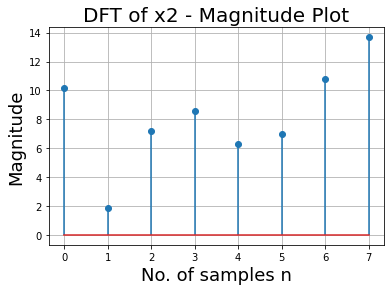

[-1.76819189  2.4566306  -0.5880026  -1.94048062  2.8198421   1.36610163
  0.38050638 -0.62449755]


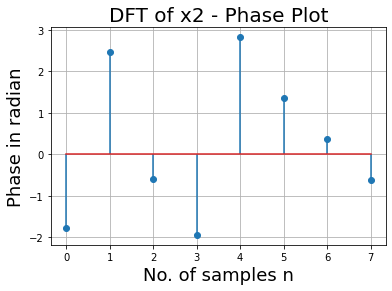

In [16]:
X2phase = np.zeros(len(X2))
X2mag = np.zeros(len(X2))

for i in range(0,len(X2)) :
    polari = cmath.polar(X2[i])
    X2mag[i] = polari[0]
    X2phase[i] = polari[1]
    
print(X2mag)
plt.stem(X2mag)
plt.title("DFT of x2 - Magnitude Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Magnitude', fontsize= 18)
plt.grid(True)
plt.show()

print(X2phase)
plt.stem(X2phase)
plt.title("DFT of x2 - Phase Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Phase in radian', fontsize= 18)
plt.grid(True)
plt.show()

[ 2.-2.j  0.+0.j  3.-4.j  0.+0.j -6.-2.j  0.+0.j -1.-2.j  0.+0.j]
[2.82842712 0.         5.         0.         6.32455532 0.
 2.23606798 0.        ]


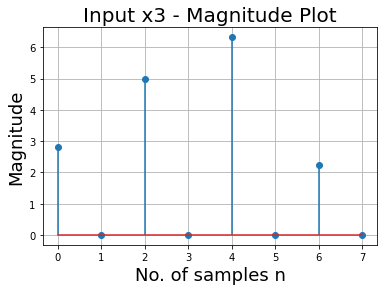

[-0.78539816  0.         -0.92729522  0.         -2.8198421   0.
 -2.03444394  0.        ]


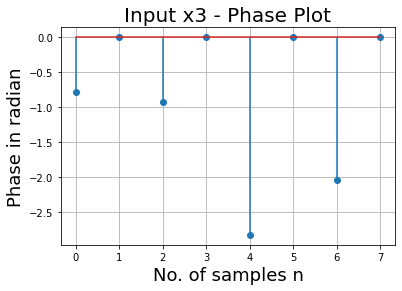

In [23]:
x3 = np.array([2-2j, 0 , 3-4j, 0,  -6-2j, 0,  -1-2j, 0])
print(x3)

x3phase = np.zeros(len(x3))
x3mag = np.zeros(len(x3))


for i in range(0,len(x3)) :
    polari = cmath.polar(x3[i])
    x3mag[i] = polari[0]
    x3phase[i] = polari[1]
    
print(x3mag)
plt.stem(x3mag)
plt.title("Input x3 - Magnitude Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Magnitude', fontsize= 18)
plt.grid(True)
plt.show()

print(x3phase)
plt.stem(x3phase)
plt.title("Input x3 - Phase Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Phase in radian', fontsize= 18)
plt.grid(True)
plt.show()

In [18]:
#DFT result
X3 = np.matmul(W2,x3)
print(X3)

[-2.-10.j  6. -4.j -6. +2.j 10. +4.j -2.-10.j  6. -4.j -6. +2.j 10. +4.j]


In [19]:
#verification
from scipy.fft import fft, ifft
y = fft(x3)

y

array([-2.-10.j,  6. -4.j, -6. +2.j, 10. +4.j, -2.-10.j,  6. -4.j,
       -6. +2.j, 10. +4.j])

[10.19803903  7.21110255  6.32455532 10.77032961 10.19803903  7.21110255
  6.32455532 10.77032961]


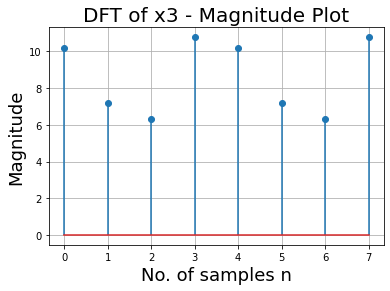

[-1.76819189 -0.5880026   2.8198421   0.38050638 -1.76819189 -0.5880026
  2.8198421   0.38050638]


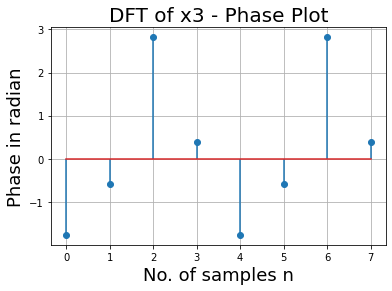

In [20]:
X3phase = np.zeros(len(X3))
X3mag = np.zeros(len(X3))

for i in range(0,len(X3)) :
    polari = cmath.polar(X3[i])
    X3mag[i] = polari[0]
    X3phase[i] = polari[1]
    
print(X3mag)
plt.stem(X3mag)
plt.title("DFT of x3 - Magnitude Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Magnitude', fontsize= 18)
plt.grid(True)
plt.show()

print(X3phase)
plt.stem(X3phase)
plt.title("DFT of x3 - Phase Plot", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Phase in radian', fontsize= 18)
plt.grid(True)
plt.show()